In [2]:
%matplotlib inline
import pandas as pd
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import warnings
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spam.csv', usecols = [0,1], encoding='latin-1')
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e653836d8>]], dtype=object)

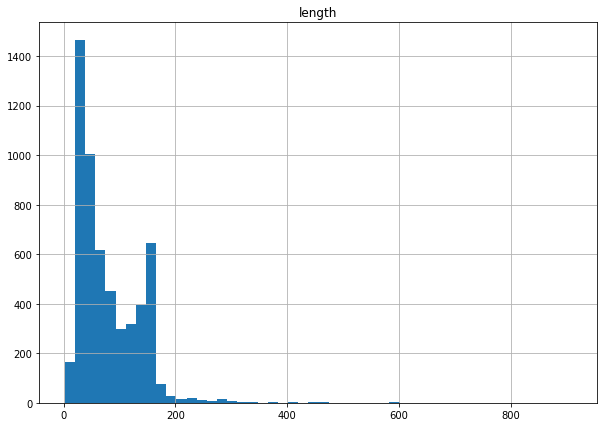

In [6]:
df['length'] = df['message'].map(lambda x: len(x))
df.hist(column='length', bins=50, figsize=(10, 7))

In [7]:
nltk.download("punkt")
nltk.download("stopwords")
warnings.filterwarnings('ignore')
ham_words = ''
spam_words = ''

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
for text in df[df['label'] == 'spam'].message:
    tokens = nltk.word_tokenize(text.lower())
    for word in tokens:
        spam_words = spam_words + word + ' '
        
for text in df[df['label'] == 'ham'].message:
    tokens = nltk.word_tokenize(text.lower())
    for word in tokens:
        ham_words = ham_words + word + ' '


In [9]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

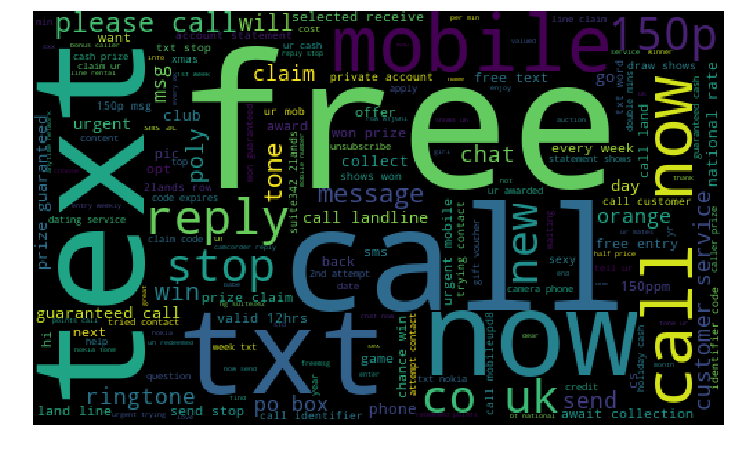

In [10]:
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

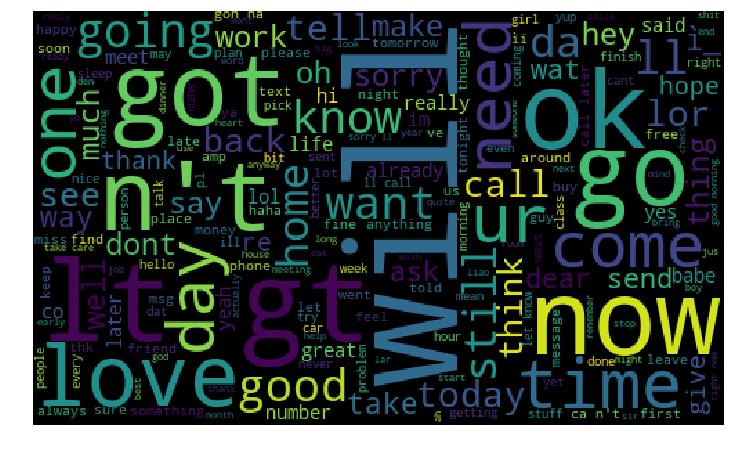

In [11]:
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
df = df.replace(['ham', 'spam'], [0, 1])

In [13]:
df.head(10)

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [14]:
import string

def message_process(message):
    message = message.translate(str.maketrans('', '', string.punctuation))
    message = [word for word in message.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(message)

In [15]:
df['message'] = df['message'].apply(message_process)

In [16]:
df.head()

,label,message,length
0,0,Go jurong point crazy Available bugis n great ...,111
1,0,Ok lar Joking wif u oni,29
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...,155
3,0,U dun say early hor U c already say,49
4,0,Nah dont think goes usf lives around though,61


In [17]:
text = pd.DataFrame(df['message'])
label = pd.DataFrame(df['label'])